In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from imblearn.over_sampling import SMOTE
import pickle

import warnings
warnings.filterwarnings("ignore")

In [86]:
df = pd.read_csv("Copper_Set.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [87]:
df.shape

(181673, 14)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [89]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [90]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [91]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

* id have all unique values.
* id and material_ref columns are not relevant for our problem statement, so we will drop these columns.

In [92]:
df.drop(columns=["id", "material_ref"], inplace=True)

In [93]:
df.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

* The null values are very low, and the features do not provide any logic if we fill them with statistically calculated values, so we drop empty value rows.

In [94]:
df.dropna(inplace=True)

In [95]:
# Convert to required data types
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce').astype('float64')
df['customer'] = df['customer'].astype('int')
df['country'] = df['country'].astype('int')
df['application'] = df['application'].astype('int')




In [96]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181636,1.816370e+05,1.816380e+05,181638.000000,181638.000000,181638.000000,181638.000000,1.816380e+05,181636,1.816380e+05
mean,2020-11-26 23:03:06.544517632,5.876038e+03,3.023251e+07,44.893079,25.616286,2.564151,1295.262682,4.740325e+08,2021-01-25 22:49:29.332070656,1.918328e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.096866e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036258e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716145e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349308e+06,1.005615e+05,24.404245,17.754183,6.572518,261.642520,7.175384e+08,NaN,3.318267e+05


* "quantity tons" and "selling_price" columns have negative values, which is not logically possible, so we replace the negative values with Nan

In [97]:
# Replace negative and zero values with NaN
df.loc[df['quantity tons'] <= 0, 'quantity tons'] = np.nan
df.loc[df['selling_price'] <= 0, 'selling_price'] = np.nan

In [98]:
df.isnull().sum()

item_date        2
quantity tons    5
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    2
selling_price    7
dtype: int64

In [99]:
df.dropna(inplace=True)

In [100]:
df.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                  int64
country                   int64
status                   object
item type                object
application               int64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

Skewness & Outlier Detection

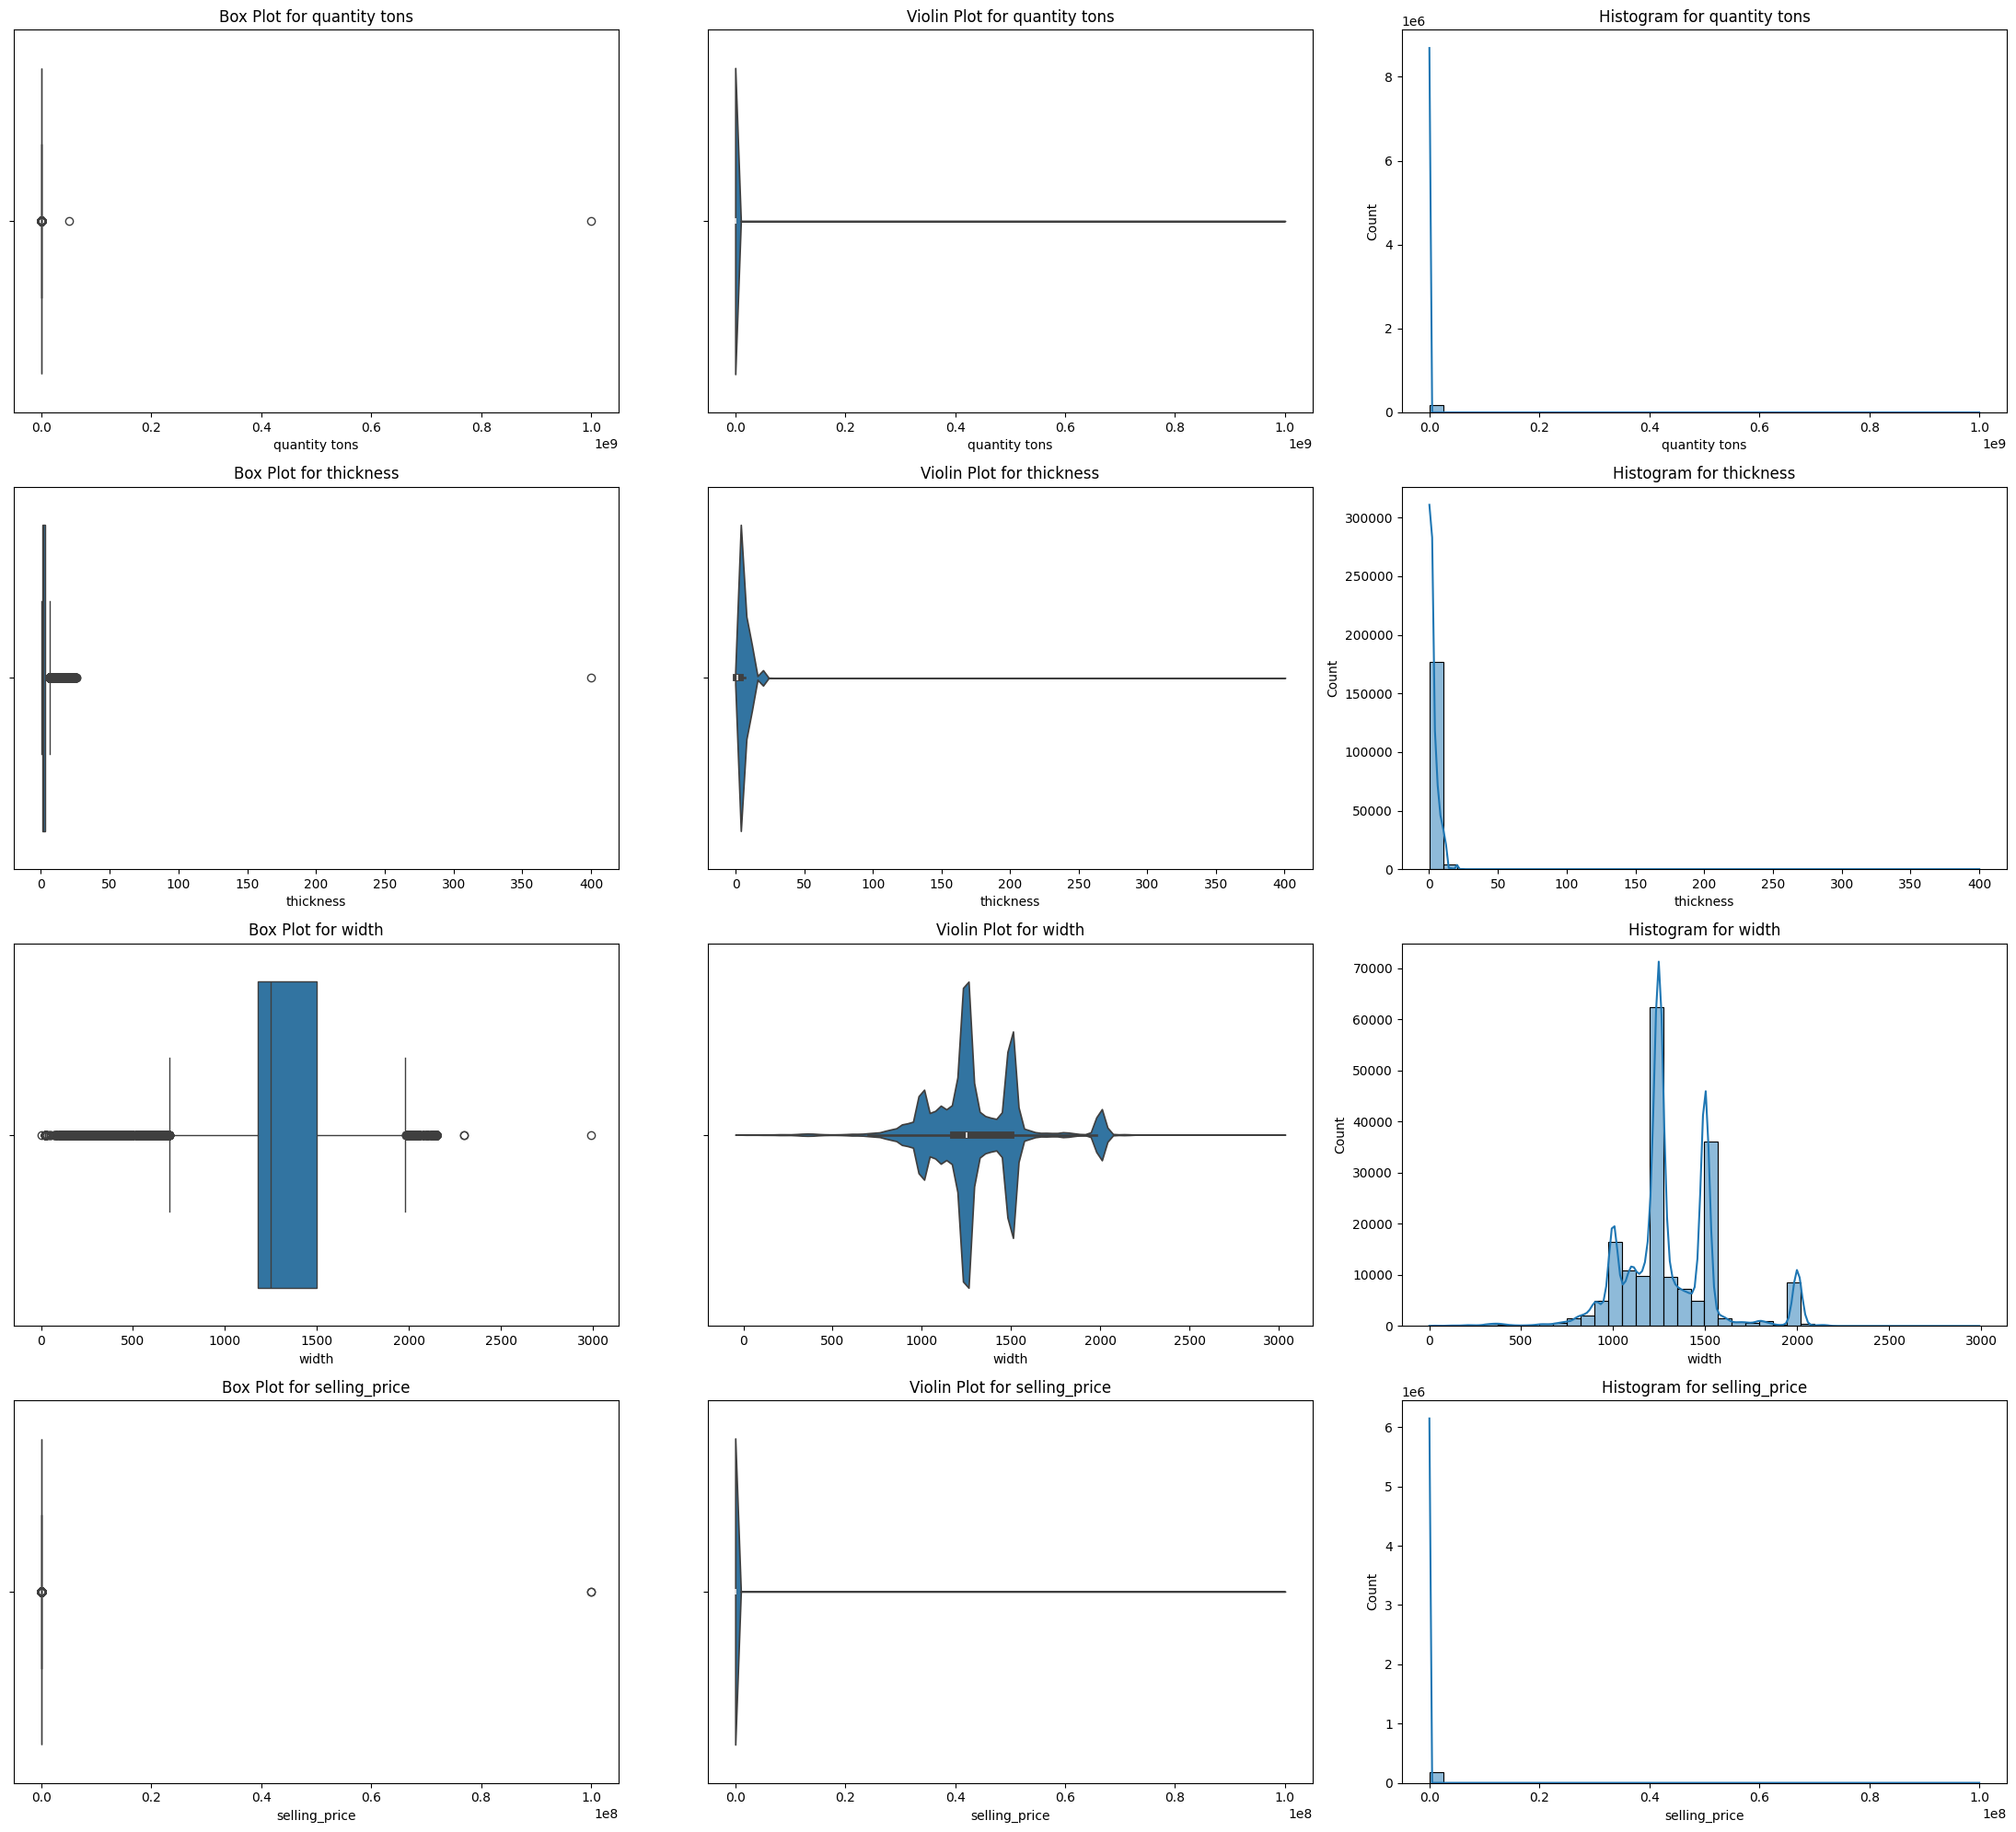

In [101]:
def outlier_skewness_detection(df, columns_plot):
    required_plots = len(columns_plot) * 3
    grid_columns = 3
    grid_rows = (required_plots + grid_columns - 1) // grid_columns
    fig, axes = plt.subplots(grid_rows, grid_columns, figsize = (22,20))
    axes = axes.flatten()

    for i, column in enumerate(columns_plot):
        sns.boxplot(x=df[column], ax=axes[i*3])
        axes[i*3].set_title(f"Box Plot for {column}")
        sns.violinplot(x=df[column], ax=axes[i*3 +1])
        axes[i*3+1].set_title(f"Violin Plot for {column}")
        sns.histplot(x=df[column], kde=True, bins=40, ax=axes[i*3+2])
        axes[i*3+2].set_title(f"Histogram for {column}")

    for j in range(required_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

columns_plot = ['quantity tons', 'thickness', 'width', 'selling_price']
outlier_skewness_detection(df, columns_plot)

* From the above plots, it is clear that the features are skewed and contain outliers.

Log transformation for skewness correction

In [102]:
req_log_transformation_col = ['quantity tons', 'thickness', 'selling_price']

for i in req_log_transformation_col:
    df[i] = np.log(df[i])

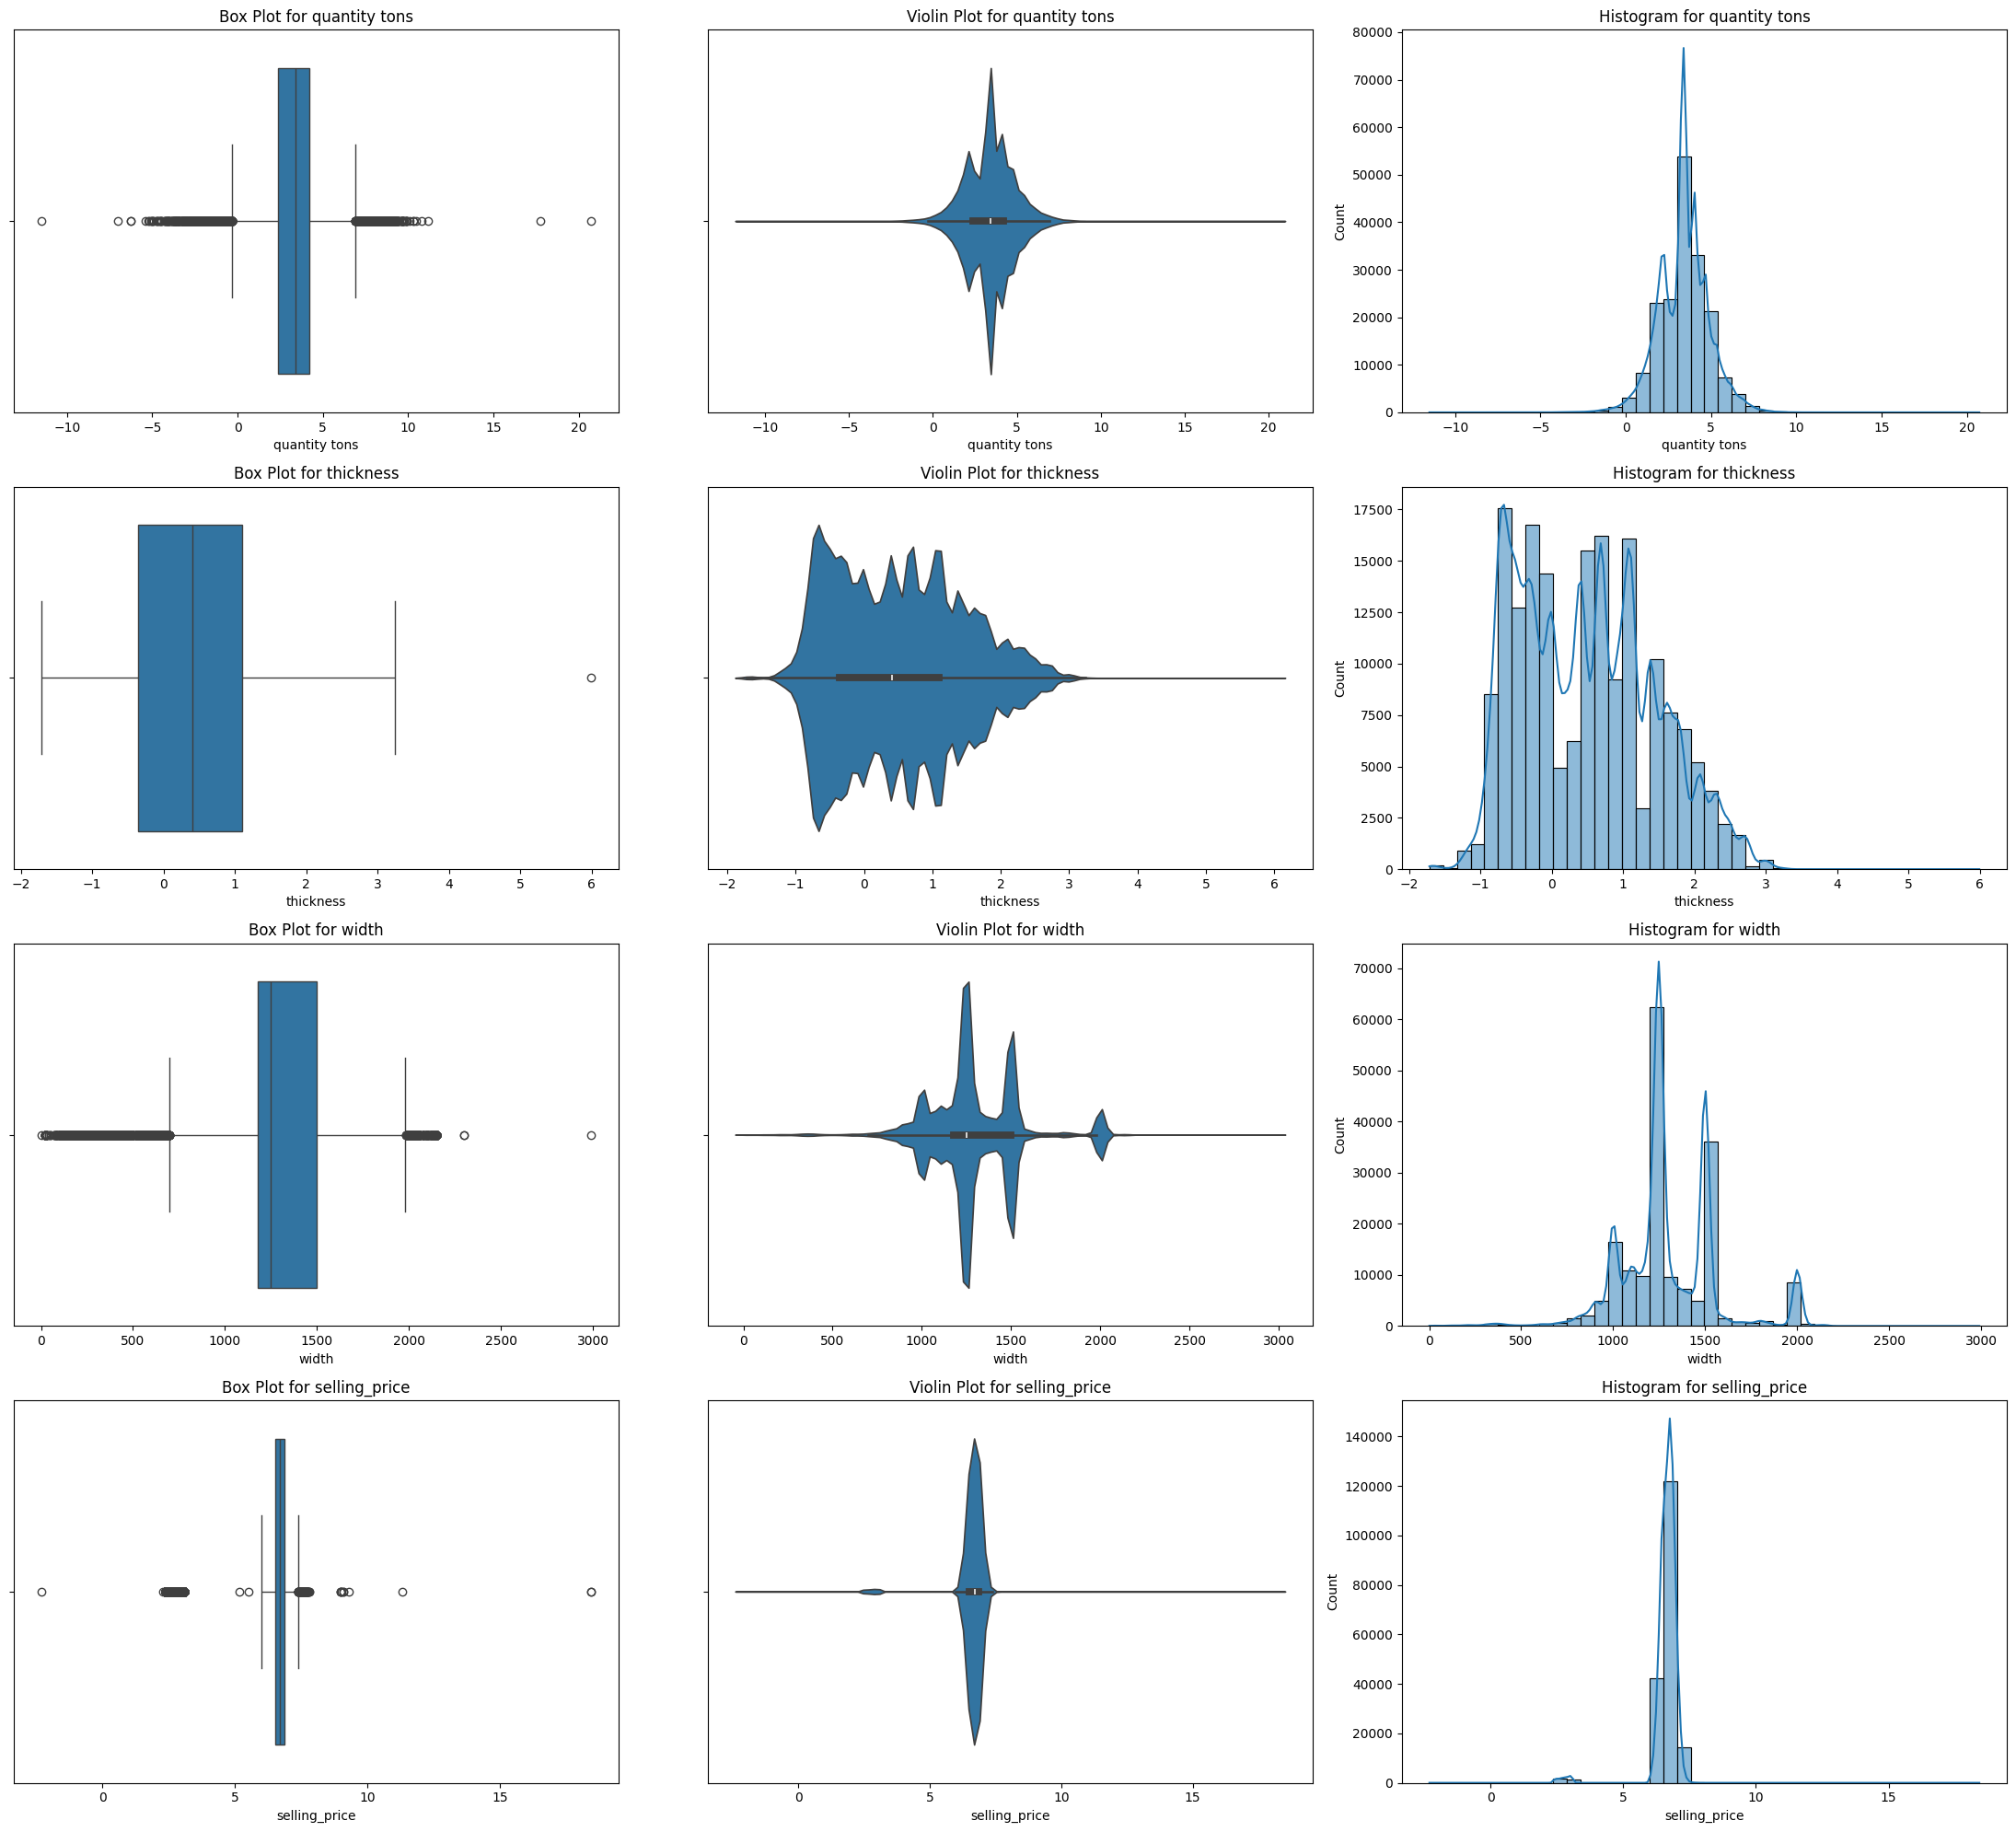

In [103]:
columns_plot = ['quantity tons', 'thickness', 'width', 'selling_price']
outlier_skewness_detection(df, columns_plot)

* Let's find the outliers data using IQR method

In [104]:
def outlier_rem_IQR(df, col):

    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)

    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold  = Q3 + 1.5 * IQR

    # df = df[(df[col] >= lower_threshold) & (df[col] <= upper_threshold)]
    df[col] = df[col].clip(lower=lower_threshold, upper=upper_threshold)
    return df

In [105]:
outlier_rem_col = ['quantity tons', 'thickness', 'width', 'selling_price']
for i in outlier_rem_col:
    df = outlier_rem_IQR(df, i)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308,28,Won,W,10,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938,25,Won,W,41,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963,30,Won,WI,28,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574,32,Won,S,59,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560,28,Won,W,10,1.386294,1981.5,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,4.670802,30200854,25,Won,W,41,-0.040822,1240.0,164141591,2020-07-01,6.400257
181668,2020-07-02,4.629691,30200854,25,Won,W,41,-0.040822,1220.0,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854,25,Won,W,41,-0.051293,1500.0,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854,25,Won,W,41,-0.342490,1250.0,164141591,2020-07-01,6.428105


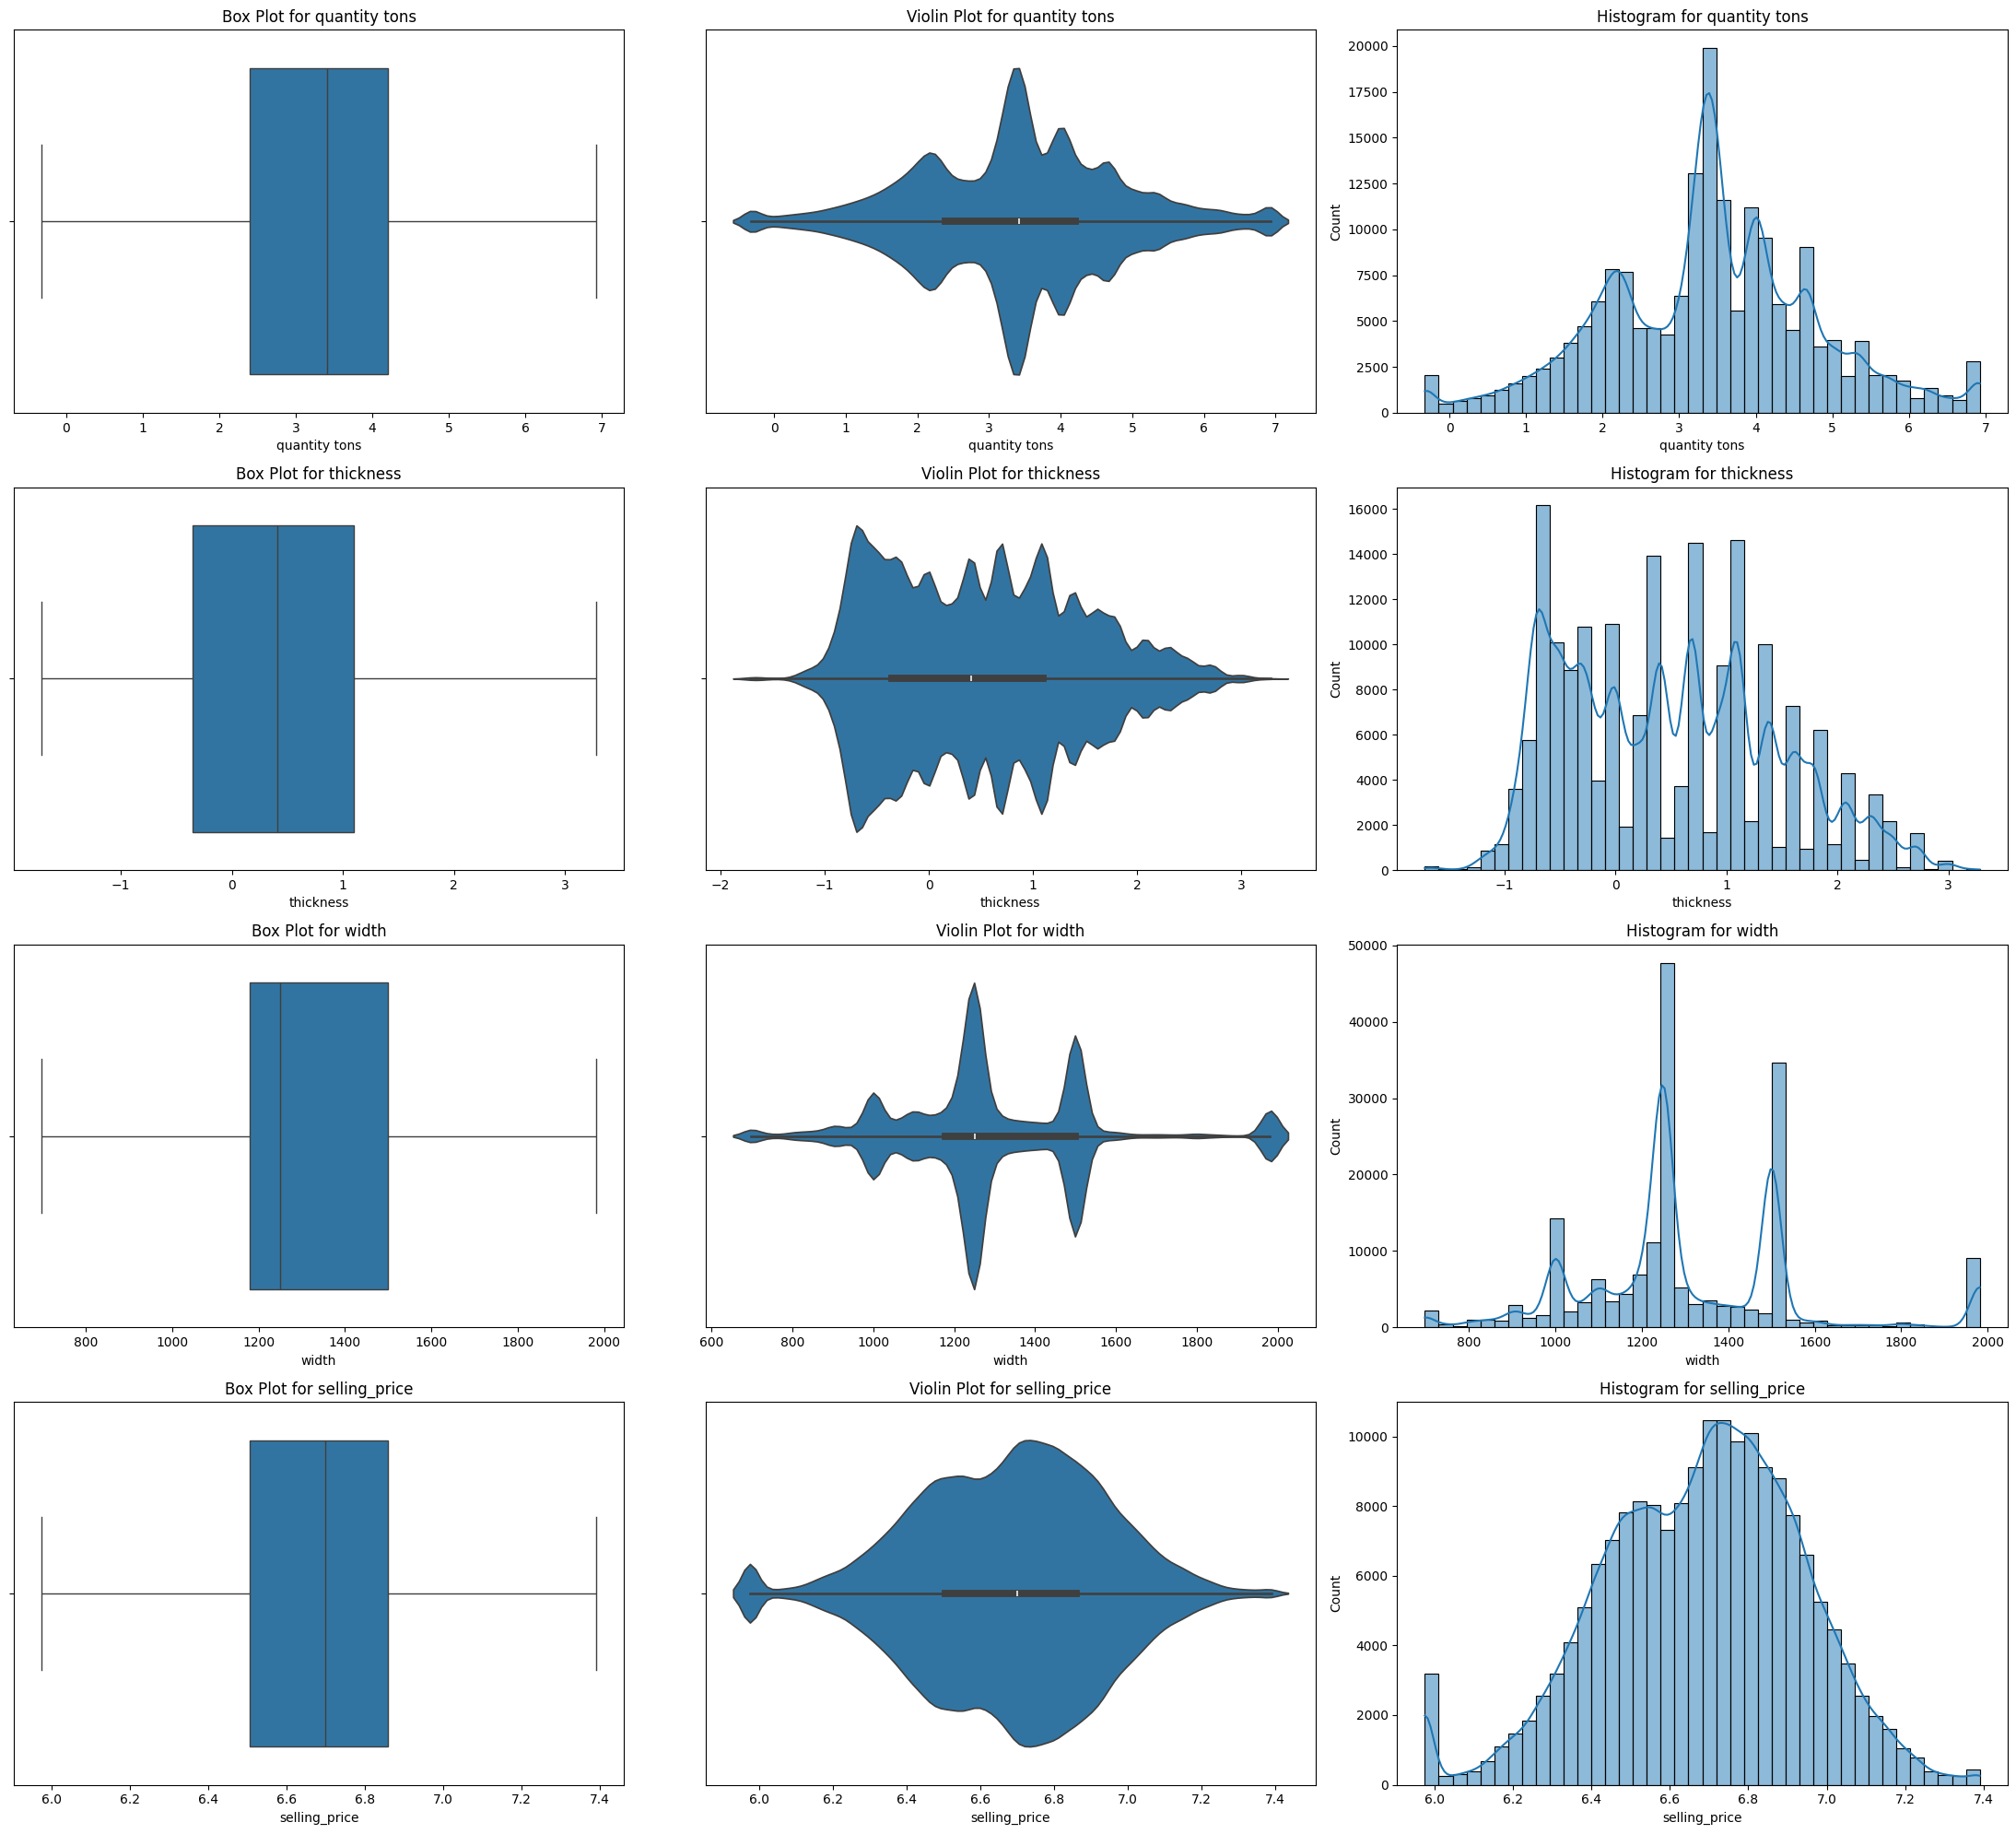

In [106]:
columns_plot = ['quantity tons', 'thickness', 'width', 'selling_price']
outlier_skewness_detection(df, columns_plot)

Convert all categorical independent variables to numerical values

In [107]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

As we require only status "Won" and "Lost", we remove all the rows with other status

In [108]:
df = df[(df['status'] == 'Won') | (df['status'] == 'Lost')]


In [109]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [110]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the required variable
df['item type'] = label_encoder.fit_transform(df['item type'])

with open('label_encoder_item_type.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Define mapping dictionary
mapping_dict = {
    'Lost': 0,
    'Won': 1
}

# Map values to 0 and 1
df['status'] = df['status'].map(mapping_dict).astype(int)

Some of the delivery dates are before the item date, this is not logically correct, so we will create a model to predict appropriate delivery date for such scenarios.

In [111]:
df['date_difference'] = (df['delivery date'] - df['item_date']).dt.days

In [112]:
df['date_difference']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181667    -1
181668    -1
181669    -1
181670    -1
181672    -1
Name: date_difference, Length: 150428, dtype: int64

In [113]:
df['item_date_day'] = df['item_date'].dt.day
df['item_date_month'] = df['item_date'].dt.month
df['item_date_year'] = df['item_date'].dt.year

In [114]:
df_positive_date_diff = df[df['date_difference'] >= 0].reset_index(drop=True)
df_negative_date_diff = df[df['date_difference'] < 0].reset_index(drop=True)


In [115]:
X =  df_positive_date_diff.drop(columns=['item_date', 'delivery date', 'date_difference'])
y = df_positive_date_diff['date_difference']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [116]:
X

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year
0,3.991779,30156308,28,1,5,10,0.693147,1500.0,1670798778,6.749931,1,4,2021
1,6.643822,30202938,25,1,5,41,-0.223144,1210.0,1668701718,6.953684,1,4,2021
2,5.419608,30202938,25,1,5,41,0.405465,1265.0,1668701718,6.890609,1,4,2021
3,4.235147,30341428,38,1,3,10,-0.510826,1275.0,1668701376,7.217443,1,4,2021
4,6.446714,30202938,25,1,5,41,0.405465,1165.0,1668701718,6.890609,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135769,3.472467,30227718,25,0,3,15,1.791759,1981.5,640665,6.313548,2,7,2020
135770,4.196171,30161559,30,0,3,10,1.348073,1525.0,640665,6.126869,2,7,2020
135771,4.156686,30161559,30,0,3,10,1.766442,1525.0,640665,6.124683,2,7,2020
135772,4.025862,30161559,30,0,3,10,2.060514,1500.0,640665,6.126869,2,7,2020


In [117]:
# Train and evaluate models
def predict_regression(X_train, X_test, y_train, y_test, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    return mse, rmse, mae, r2, model

In [118]:
models = {
        # 'Random Forest Regressor': RandomForestRegressor(random_state=42),
        # 'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        # 'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
        # 'XGBoost Regressor': XGBRegressor(),
        'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
        # 'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

all_date_diff_model_data = {}

for model_name, model in models.items():

    print(f"\n{model_name} model :")
    mse, rmse, mae, r2, model = predict_regression(X_train, X_test, y_train, y_test, model)

    all_date_diff_model_data[model_name] = {"Model": model, "Mean Absolute Error": round(mae,5), "Mean Squared Error": round(mse,5), "Root Mean Squared Error": round(rmse,5), "R2": r2}
    print(all_date_diff_model_data[model_name])
    print("___________________________________________________________________________________")



Extra Trees Regressor model :
{'Model': ExtraTreesRegressor(random_state=42), 'Mean Absolute Error': np.float64(2.60078), 'Mean Squared Error': np.float64(61.31208), 'Root Mean Squared Error': np.float64(7.8302), 'R2': 0.9600575761419088}
___________________________________________________________________________________


In [119]:
best_date_diff_model = all_date_diff_model_data['Extra Trees Regressor']['Model']

In [120]:
X_test_new = df_negative_date_diff.drop(columns=['item_date', 'delivery date', 'date_difference'])

In [121]:
df_negative_date_diff['date_difference'] = pd.DataFrame(best_date_diff_model.predict(X_test_new).astype(int))

* Update the delivery date using predicted date difference for the negative date difference dataset

In [122]:
df_negative_date_diff['delivery date'] = (df_negative_date_diff['item_date'] + pd.to_timedelta(df_negative_date_diff['date_difference'], unit='D'))

In [123]:
df_negative_date_diff

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,date_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,5.956169,30153963,30,1,6,28,-0.967584,952.0,628377,2021-05-22,6.468211,51,1,4,2021
1,2021-04-01,5.310301,30349574,32,1,3,59,0.832909,1317.0,1668701718,2021-06-18,6.643790,78,1,4,2021
2,2021-04-01,6.666354,30211560,28,1,5,10,1.386294,1981.5,640665,2021-06-21,6.357842,81,1,4,2021
3,2021-04-01,4.730808,30342192,32,1,5,41,-0.385662,1220.0,611993,2021-06-04,6.836259,64,1,4,2021
4,2021-04-01,4.736160,30342192,32,1,5,41,-0.597837,1220.0,611993,2021-06-06,6.860664,66,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,2020-07-02,4.670802,30200854,25,1,5,41,-0.040822,1240.0,164141591,2020-08-05,6.400257,34,2,7,2020
14650,2020-07-02,4.629691,30200854,25,1,5,41,-0.040822,1220.0,164141591,2020-08-05,6.381816,34,2,7,2020
14651,2020-07-02,5.337954,30200854,25,1,5,41,-0.051293,1500.0,164141591,2020-08-06,6.378426,35,2,7,2020
14652,2020-07-02,1.443523,30200854,25,1,5,41,-0.342490,1250.0,164141591,2020-08-04,6.428105,33,2,7,2020


In [124]:
df_1 = pd.concat([df_positive_date_diff, df_negative_date_diff], axis=0, ignore_index=True)

In [125]:

df_1['delivery_date_day'] = df_1['delivery date'].dt.day
df_1['delivery_date_month'] = df_1['delivery date'].dt.month
df_1['delivery_date_year'] = df_1['delivery date'].dt.year

df_1.drop(columns=['item_date', 'delivery date', 'date_difference'], inplace=True)

In [126]:
df_1

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,3.991779,30156308,28,1,5,10,0.693147,1500.0,1670798778,6.749931,1,4,2021,1,7,2021
1,6.643822,30202938,25,1,5,41,-0.223144,1210.0,1668701718,6.953684,1,4,2021,1,4,2021
2,5.419608,30202938,25,1,5,41,0.405465,1265.0,1668701718,6.890609,1,4,2021,1,4,2021
3,4.235147,30341428,38,1,3,10,-0.510826,1275.0,1668701376,7.217443,1,4,2021,1,7,2021
4,6.446714,30202938,25,1,5,41,0.405465,1165.0,1668701718,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150423,4.670802,30200854,25,1,5,41,-0.040822,1240.0,164141591,6.400257,2,7,2020,5,8,2020
150424,4.629691,30200854,25,1,5,41,-0.040822,1220.0,164141591,6.381816,2,7,2020,5,8,2020
150425,5.337954,30200854,25,1,5,41,-0.051293,1500.0,164141591,6.378426,2,7,2020,6,8,2020
150426,1.443523,30200854,25,1,5,41,-0.342490,1250.0,164141591,6.428105,2,7,2020,4,8,2020


Classification model to predict Status: WON or LOST


In [127]:
X = df_1.drop(columns=['status'])
y = df_1['status']

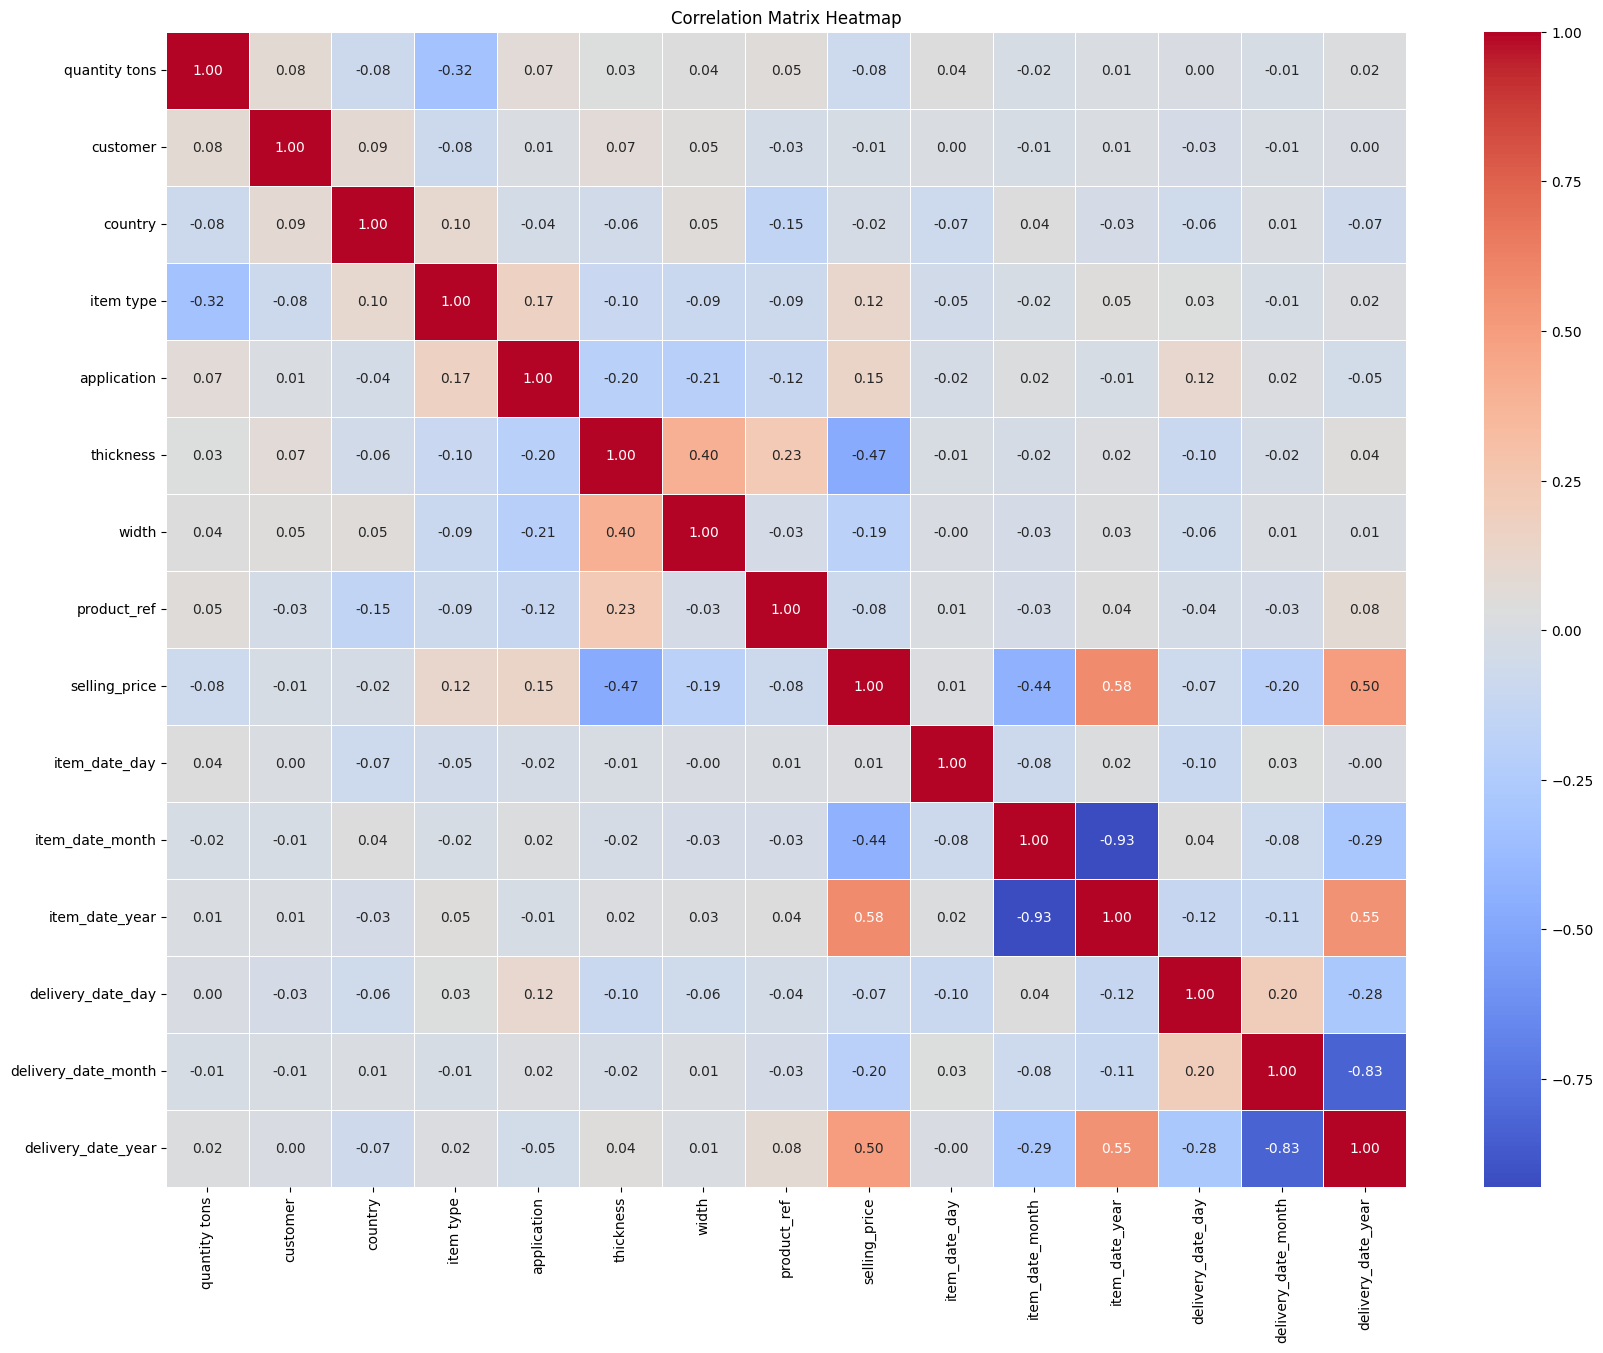

In [128]:
corr = X.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [129]:
y.value_counts()

status
1    115997
0     34431
Name: count, dtype: int64

* Clearly, this is a case of class imbalance.
* We will use the Synthetic Minority Oversampling Technique (SMOTE) to address the imbalanced dataset by synthetically generating new instances for the minority class.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size = 0.2)


In [131]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [132]:
y_train_resampled.value_counts()

status
0    92851
1    92851
Name: count, dtype: int64

In [133]:
# Train and evaluate models
def predict_status(X_train, X_test, y_train, y_test, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return conf_matrix, class_report, accuracy, precision, recall, model

In [134]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XG Boost": XGBClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42)
}

all_models_status = {}

for model_name, model in models.items():

    print(f"\n{model_name} model :")
    conf_matrix, class_report, accuracy, precision, recall, model = predict_status(X_train_resampled, X_test, y_train_resampled, y_test, model)
    # conf_matrix, class_report, accuracy, precision, recall, model = predict_status(X_train, X_test, y_train, y_test, model)
    print(class_report)
    print(f"Accuracy : {accuracy}")
    params = model.get_params()
    all_models_status[model_name] = {"Model": model, "Accuracy": accuracy, "Recall": recall, "Precision": precision, "Confusion Matrix": conf_matrix, "Classification Report": class_report, "Params": params}
    print("___________________________________________________________________________________")



Random Forest model :
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6940
           1       0.98      0.97      0.98     23146

    accuracy                           0.97     30086
   macro avg       0.95      0.96      0.95     30086
weighted avg       0.97      0.97      0.97     30086

Accuracy : 0.9668616632320681
___________________________________________________________________________________

AdaBoost model :
              precision    recall  f1-score   support

           0       0.43      0.73      0.54      6940
           1       0.90      0.71      0.79     23146

    accuracy                           0.71     30086
   macro avg       0.66      0.72      0.66     30086
weighted avg       0.79      0.71      0.73     30086

Accuracy : 0.7121917170777106
___________________________________________________________________________________

Gradient Boosting model :
              precision    recall  f1-score   supp

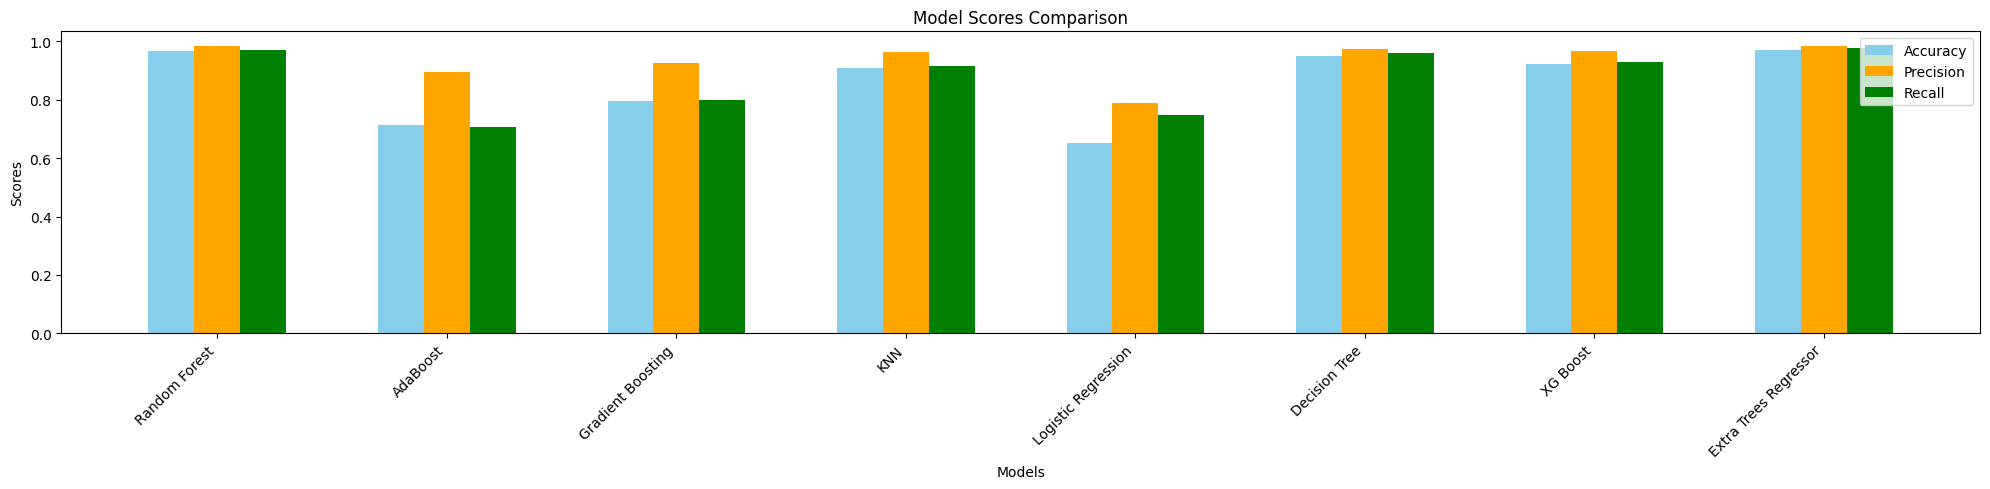

In [135]:
plt.subplots(figsize=(20,5))
# Extract model names and accuracies from all_model_data
model_names = list(all_models_status.keys())
accuracies = [all_models_status[model]["Accuracy"] for model in model_names]
precisions = [all_models_status[model]["Precision"] for model in model_names]
recalls = [all_models_status[model]["Recall"] for model in model_names]

# plt.bar(model_names, accuracies, color='skyblue')
bar_width = 0.2
index = np.arange(len(model_names))

plt.bar(index - bar_width, accuracies, bar_width, label='Accuracy', color='skyblue')
plt.bar(index, precisions, bar_width, label='Precision', color='orange')
plt.bar(index + bar_width, recalls, bar_width, label='Recall', color='green')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Scores Comparison')
plt.xticks(index, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

* Here "Random Forest Classifier" is one of the best model, so next we will try to increase the model accuracy by hypertuning the parameters of "Random Forest Classifier" model.

In [136]:
best_status_prediction_model = all_models_status['Random Forest']['Model']
best_status_prediction_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=5,n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2}
Best Parameters: 0.9780724811270595


In [137]:
# Training the model with best parameters
final_rf_model = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_split = 2, random_state = 42)
final_rf_model.fit(X_train_resampled, y_train_resampled)

Y_test_pred_rf = final_rf_model.predict(X_test)

classification_rep_rf = classification_report(y_test, Y_test_pred_rf, target_names=['Lost', 'Won'])
confusion_mat_rf = confusion_matrix(y_test, Y_test_pred_rf)
print(f"Hypertuned Random Forest Classifier Model Accuracy : {round(accuracy_score(y_test, Y_test_pred_rf), 2)}")
print(f"Model Params : {final_rf_model.get_params()}")
print(f"Classification Report : \n {classification_rep_rf}")

Hypertuned Random Forest Classifier Model Accuracy : 0.97
Model Params : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Classification Report : 
               precision    recall  f1-score   support

        Lost       0.91      0.95      0.93      6940
         Won       0.98      0.97      0.98     23146

    accuracy                           0.97     30086
   macro avg       0.95      0.96      0.95     30086
weighted avg       0.97      0.97      0.97     30086



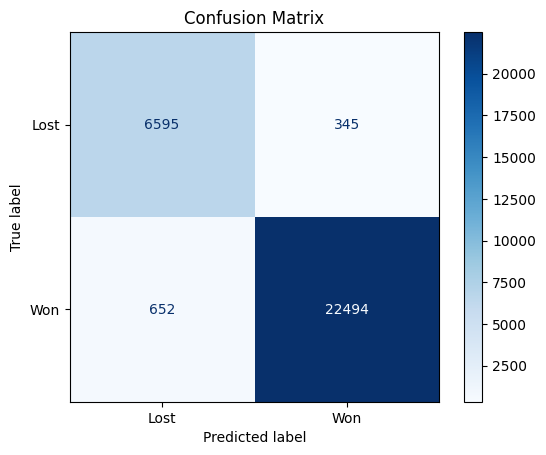

In [138]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_rf, display_labels=['Lost', 'Won'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

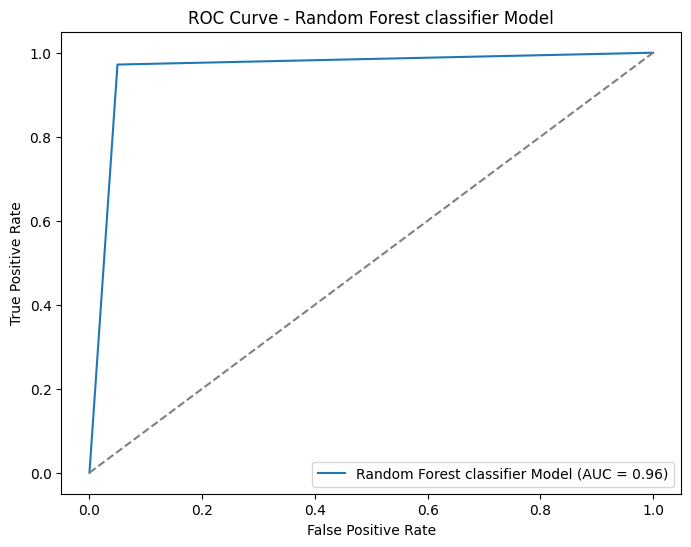

In [139]:
# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, Y_test_pred_rf)
auc_score = roc_auc_score(y_test, Y_test_pred_rf)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest classifier Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Random Forest classifier Model')
plt.legend(loc='lower right')
plt.show()

Save the "Status" prediction model into a file

In [140]:
with open("status_prediction_model.pkl", "wb") as f:
    pickle.dump(final_rf_model, f)

Regression model to predict Selling Price

In [141]:
X = df_1.drop(columns=["selling_price"])
y = df_1["selling_price"]

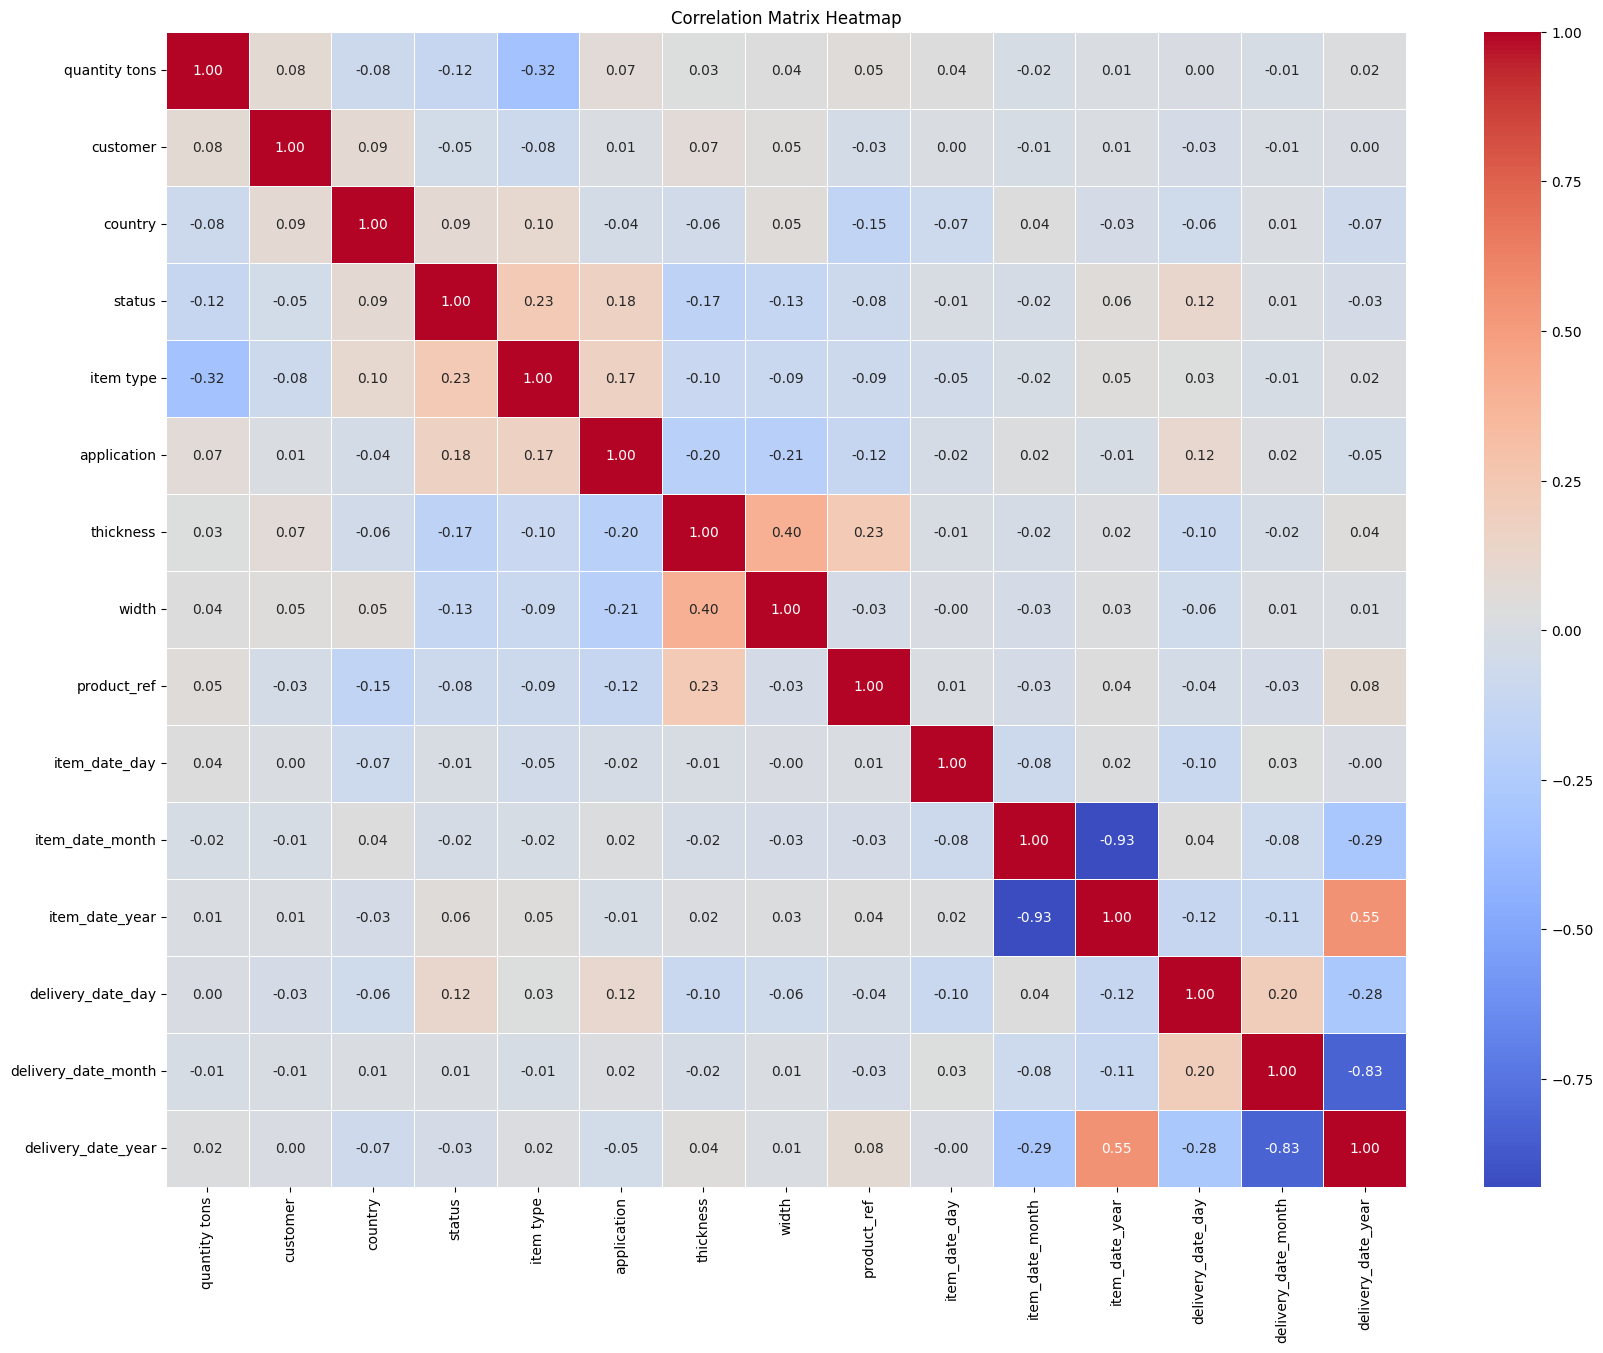

In [142]:
corr = X.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [144]:
models = {
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
        'XGBoost Regressor': XGBRegressor(),
        'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

all_model_price = {}

for model_name, model in models.items():

    print(f"\n{model_name} model :")
    mse, rmse, mae, r2, model = predict_regression(X_train, X_test, y_train, y_test, model)

    all_model_price[model_name] = {"Model": model, "Mean Absolute Error": round(mae,5), "Mean Squared Error": round(mse,5), "Root Mean Squared Error": round(rmse,5), "R2": r2}
    print(all_model_price[model_name])
    print("___________________________________________________________________________________")



Random Forest Regressor model :
{'Model': RandomForestRegressor(random_state=42), 'Mean Absolute Error': np.float64(0.02977), 'Mean Squared Error': np.float64(0.00227), 'Root Mean Squared Error': np.float64(0.04762), 'R2': 0.9600552444467154}
___________________________________________________________________________________

Decision Tree Regressor model :
{'Model': DecisionTreeRegressor(random_state=42), 'Mean Absolute Error': np.float64(0.03647), 'Mean Squared Error': np.float64(0.00403), 'Root Mean Squared Error': np.float64(0.06349), 'R2': 0.9289828312178132}
___________________________________________________________________________________

AdaBoost Regressor model :
{'Model': AdaBoostRegressor(random_state=42), 'Mean Absolute Error': np.float64(0.1001), 'Mean Squared Error': np.float64(0.01604), 'Root Mean Squared Error': np.float64(0.12665), 'R2': 0.717416044899226}
___________________________________________________________________________________

XGBoost Regressor model :


* Here "Random Forest Regressor" is one of the best model, so next we will try to increase the model accuracy by hypertuning the parameters of "Random Forest Regressor" model.

In [145]:
best_selling_price_pred_model = all_model_price["Random Forest Regressor"]["Model"]
best_selling_price_pred_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:


param_grid =   {
                'n_estimators'     : [100, 200, 300],
                'min_samples_split': [2, 5, 10],
                'max_features'     : [1, 'sqrt', 'log2', None]
                }

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='accuracy', cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_features': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [146]:
# Training the model with best parameters
final_rf2_model = best_selling_price_pred_model

Y_test_pred_rf2 = final_rf2_model.predict(X_test)

mse = mean_squared_error(y_test, Y_test_pred_rf2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, Y_test_pred_rf2)
r2 = r2_score(y_test, Y_test_pred_rf2)

print(f"Mean Absolute Error : {round(mae,5)}")
print(f"Mean Squared Error : {round(mse,5)}")
print(f"Root Mean Squared Error : {round(rmse,5)}")
print(f"R2 Score : {r2}")

Mean Absolute Error : 0.02977
Mean Squared Error : 0.00227
Root Mean Squared Error : 0.04762
R2 Score : 0.9600552444467154


In [147]:
with open("selling_price_prediction_model.pkl", "wb") as f:
    pickle.dump(final_rf2_model, f)

In [148]:
# np.exp(final_rf2_model.predict([[3.473092	,30205190	,84,	0	,3	,10	,1.609438,	1500.0	,1671863738,	3,	11	,2020	,1,	4,	2021]]))